In [7]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import emoji
import time

In [8]:
# vader's text analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [9]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [10]:
chrome_path = "chromedriver"

# # youtube rewind 2018
# url = 'https://www.youtube.com/watch?v=YbJOTdZBX1g' 

# avengers endgame trailer
url = 'https://www.youtube.com/watch?v=TcMBFSGVi1c'
# point to chromedriver executable in the curr folder
driver=webdriver.Chrome(executable_path=chrome_path)
driver.set_window_size(1024, 768)

# open the youtube link, 
# wait 3 seconds to load, 
# scroll down a little bit to trigger comment loading and wait another 3 seconds
driver.get(url) 
time.sleep(3)
driver.execute_script('window.scrollTo(1, 500);')
time.sleep(3)

# once comments have loaded, keep scrolling down until you get all the comments

# scroll all the way down once
driver.find_element_by_tag_name('body').send_keys(Keys.END)

# set current page height to 0. Page height increases as you keep scrolling down 
prev_height = 0

# only scrape for 25 seconds max
time_end = time.time() + 25

# keep scrolling down and record the current height position
# if the current height position is the same as the last
# that means you cannot scroll down anymore, so break
# otherwise keep scraping for 25 seconds
while(time.time() < time_end):
    height = driver.execute_script("return document.getElementsByTagName('ytd-app')[0].scrollHeight")
    time.sleep(3)
    driver.find_element_by_tag_name('body').send_keys(Keys.END)
    if int(height) <= prev_height:
        break
    prev_height = height

    
# send the html page source into BeautifulSoup for parsing
bs = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [5]:
# locate the element tag with the comment text
# used chrome inspect tool to find such element
comments_tag = bs.find_all("yt-formatted-string", {"slot":"content", "class":"style-scope ytd-comment-renderer", "id":"content-text"})
for comment in comments_tag:
    print(comment.get_text())

Somewhere in the heavens, Stan Lee is smiling.﻿
This is how much iron man loves his daughter 
⏬﻿
Some people won't watch trailers after watching movie....but not us .......NOT US!﻿
Your favourite movie?
ENDGAME:LIKE
AVATAR:COMMENT

WHEN ENDGAME BEATS AVATAR😪😢﻿
When Endgame beats Avatar:

What's up, regular sized movies?﻿
Avatar: highest grossing movie 

endgame: on your left﻿
Spoiler alert:
Hulk dabbed
NoobMaster69 was the villain
Thor played Fortnite﻿
Tony:One last sacrifice
Steve:one last mission
Thor:one last fight
Hawk eye:one last chance
Banner:one last battle
Natasha:one last stand

Stan lee:one last dream﻿
Captain marvel: I’m the strongest avenger

Thor: hold my beer

Also Thor: never mind give it back﻿
Some people don't take photos with ant-man



But not us



Not us﻿
Thor lost his family,
Thor lost his kingdom,
Thor lost his girl
And Thor still smiles


Always Love for him


Whatever it takes﻿
Noobmaster69 was so powerful he was one of the lucky ones to survive the snap﻿
Than

In [6]:
# find the likes and dislike element 
# returns two tags: 1 for likes and 1 for dislikes
ratings = bs.find_all("yt-formatted-string", {"class":"style-scope ytd-toggle-button-renderer style-text"})

# the tag attribute 'aria-label' contains the string value of the likes with commas
# separate the commas and then cast the string as int
likes = int( ratings[0]['aria-label'].split()[0].replace(',', '') )
dislikes = int( ratings[1]['aria-label'].split()[0].replace(',', '') )

print(emoji.emojize(':thumbs_up:') + str(likes) + " " + emoji.emojize(':thumbs_down:') + str(dislikes))

👍2835967 👎54426


In [7]:
# takes in a float value and converts it to a string interpretation
def string_round(number):
    return str( round(number*100, 2) )+"%"

In [8]:
# calculating all the results
pos = 0; neg = 0; neu = 0; compound = 0

# go through each comment and run Vader's sentimental analyzer
# add up all the respective scores
for comment in comments_tag:
    score = sentiment_analyzer_scores(comment.get_text())
    pos = pos + score['pos']
    neg = neg + score['neg']
    neu = neu + score['neu']
    compound = compound + score['compound']

# calculate the averages of likes dislikes, positive, negatives, netural comments
percent_likes = likes / (likes + dislikes)
percent_dislikes = dislikes / (likes + dislikes)
avg_pos = pos / len(comments_tag)
avg_neg = neg / len(comments_tag)
avg_neu = neu / len(comments_tag)
avg_comp = compound / len(comments_tag)

print( "pos:" + string_round(avg_pos) +  "\nneg:" + string_round(avg_neg) + "\nneu:" + string_round(avg_neu) + "\ncompound:" + string_round(avg_comp))
print( "likes:" + string_round(percent_likes) + "\n dislikes:" + string_round(percent_dislikes))
# ' '.join(comments_tag[0].contents)
# for comment in comments_tag:
#     print(comment.contents[0])

pos:13.26%
neg:5.88%
neu:80.86%
compound:11.76%
likes:98.12%
 dislikes:1.88%


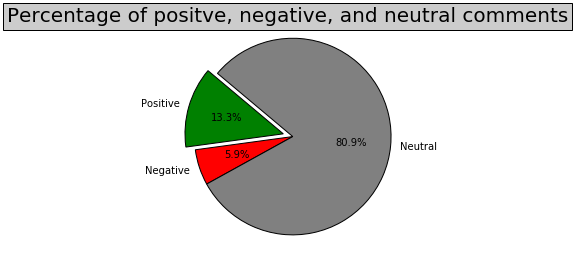

In [9]:
# graphing the results
labels = ['Positive', 'Negative', 'Neutral']
sizes = [avg_pos, avg_neg, avg_neu]
colors = ['green', 'red', 'grey']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
       wedgeprops={'linewidth':1, 'edgecolor':"k", 'antialiased':True}, explode=(0.1, 0,0))
plt.axis('equal')
plt.title('Percentage of positve, negative, and neutral comments', fontsize=20, bbox={'facecolor':'0.8'})
plt.show()

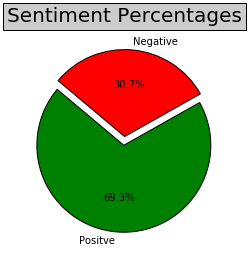

In [10]:
# ignore all neutral comments. find percentage of how much of the positve and negative comments are pos and neg
pos_neg = avg_pos + avg_neg
num_posneg_comments = pos_neg * len(comments_tag)
labels = ['Positve', 'Negative']
sizes = [pos / num_posneg_comments, neg / num_posneg_comments]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
       wedgeprops={'linewidth':1, 'edgecolor':'k', 'antialiased':True}, explode=(0.1, 0))
plt.title('Sentiment Percentages', fontsize=20, bbox={'facecolor':'0.8'})
plt.savefig('endgame_vader.png', bbox_inches='tight')
plt.show()


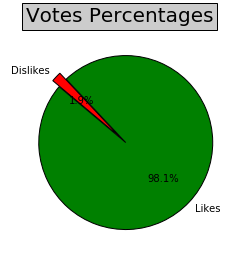

In [11]:
labels = ['Likes', 'Dislikes']
sizes = [likes, dislikes]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
       wedgeprops={'linewidth':1, 'edgecolor':'k', 'antialiased':True}, explode=(0.1, 0))
plt.title('Votes Percentages', fontsize=20, bbox={'facecolor':'0.8'})
plt.savefig('endgame_votes.png', bbox_inches='tight')
plt.show()